# Predicting Monetary Policy Changes using NLP

## Step 3: analysis of statement sentiment by lexicon

Goals of this notebook:
+ Create and improve specific dictionaries
+ Build a sentiment indicator of monetary policy
+ Asses if there is a relationship between economy and net sentiment

In [ ]:
# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')
import datetime as dt
from functools import reduce


# Import NLP modules
import re
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict, Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import spacy

data_path = '/Users/MargheritaP/Notebooks/Text_mining/Term_paper/Australia data'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Explore the text

In [ ]:
df_text = pd.read_csv(data_path+'/df_australia.csv')
# Dictionary tone assessment will compare them by Index (need the numbers back) 
df_text['Index'] = range(0, len(df_text))
print(df_text.shape)
df_text.head()

(166, 3)


,extracted_dates,Statements,Index
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4


In [ ]:
#remove extra statement from 19 Mar 2020 2020-03-20 (cashrate 20 March)
#df_text = df_text.set_index(pd.to_datetime(df_nontext_raw['extracted_dates'], format="%Y-%m-%d")).drop(columns=['dates'])
#print(df_text.shape)
#df_text.head()

df_text.drop(df_text.loc[df_text['extracted_dates']=='2020-03-19'].index, inplace=True)


In [ ]:
df_text[df_text["extracted_dates"]=='2020-03-19']

,extracted_dates,Statements,Index


In [ ]:
df_text.rename(columns = {'extracted_dates':'date','Statements':'text'}, inplace = True)
df_text_new = df_text.copy()
print(df_text.shape)
df_text_new.head()

(165, 3)


,date,text,Index
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4


In [ ]:
# for spanish
#nlp = spacy.load('es_core_news_sm', exclude=["ner"])
#stop = list(nlp.Defaults.stop_words)

# for english
stop = set(stopwords.words('english'))

# Corpus
def create_corpus(df):
    corpus = []
    
    for x in df['text'].str.split(): #rename from "text" to "Statements"
        for i in x:
            corpus.append(i.lower())
    return corpus

# Returns Top X frequent stop words
def get_frequent_stop_words(corpus, top_n=10):
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return zip(*top)

# Returns Top X frequent non stop words
def get_frequent_nonstop_words(corpus, top_n=10):
    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return zip(*top)

In [ ]:
# inspect stopwords
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
corpus = create_corpus(df_text)
x, y = get_frequent_stop_words(corpus)
w, z = get_frequent_nonstop_words(corpus)

print('Frequent stopwords: \n')
print(x)
print(y)
print('-----------------------')
print('Non-Frequent stopwords: \n')
print(w)
print(z)

Frequent stopwords: 

('the', 'in', 'to', 'of', 'and', 'is', 'a', 'has', 'for', 'on')
(6613, 3285, 3041, 2714, 2346, 1714, 1435, 952, 939, 929)
-----------------------
Non-Frequent stopwords: 

('growth', 'inflation', 'share', 'rate', 'policy', 'per', 'monetary', '2', 'board', 'economy')
(1050, 870, 844, 666, 607, 596, 594, 530, 506, 459)


<AxesSubplot:>

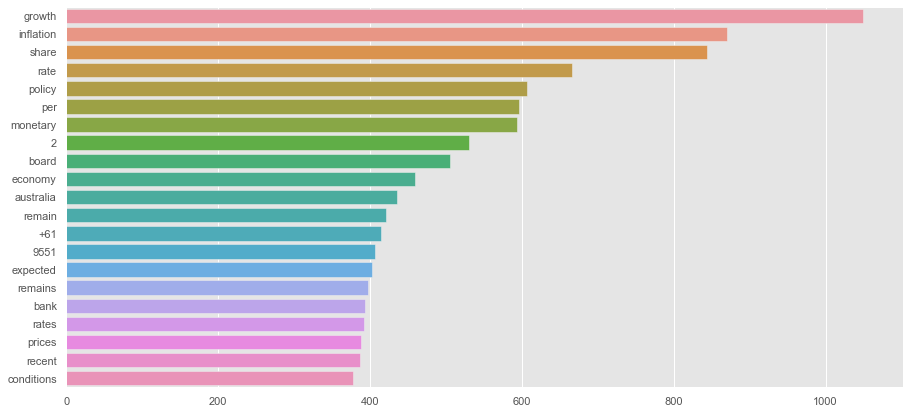

In [ ]:
# Check most frequent words which are not in stopwords
counter = Counter(corpus)
most = counter.most_common()[:45]
x, y = [], []
for word, count in most:
    if word not in stop:
        x.append(word)
        y.append(count)

plt.figure(figsize=(15,7))
sns.barplot(x=y, y=x)

## Approach 1: sentiment based on Loughran and McDonald dictionary

In [ ]:
# Load sentiment data
sentiment_english = pd.read_csv(data_path+'/english_dictionary.csv') # sentiment_spanish
#sentiment_english.head()

In [ ]:
sentiment_english['Sentiment'].value_counts()

negative    2353
positive     354
Name: Sentiment, dtype: int64

In [ ]:
sentiment_english['Word'] = sentiment_english['Word'].str.lower()
#sentiment_english.head()

In [ ]:
# Create a dictionary
sentiments = sentiment_english['Sentiment'].unique()
sentiment_dict = { sentiment: sentiment_english.loc[sentiment_english['Sentiment']==sentiment]['Word'].values.tolist() \
                  for sentiment in sentiments}


In [ ]:
sentiments

array(['negative', 'positive'], dtype=object)

In [ ]:
#sentiment_dict['positive']

#### Analyze the tone with negation without lemmatization

In [ ]:
# Consider Negation
negate_es = ["no pudo", "no se pudo", "no es", "no podría", "no debe","ninguno", "no", "no podrá", "no debería", "no necesita", 
           "nunca", "ninguno", "ni", "nada", "no necesitaría", "no fue", "no era", "sin", "no lo haría", "no habría",
           "no lo hará", "rara vez", "a pesar de", "nadie", "no se habría"]

negate_en = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate_en: #negate_es:
        return True
    else:
        return False
    
def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0
    tone_score = 0
    net_sent = 0

    pos_words = []
    neg_words = []
 
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
    word_count = len(input_words)
     
    for i in range(0, word_count):
        if input_words[i] in dict['negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
 
    if word_count > 0:
        tone_score = 100 * (pos_count - neg_count) / word_count
        net_sent = pos_count - neg_count
    else:
        tone_score = 0
    
    results = [tone_score, word_count, pos_count, neg_count, net_sent, pos_words, neg_words]
 
    return results

columns = ['tone_LM', 'word_count', 'n_pos_words', 'n_neg_words', 'net_sent', 'pos_words', 'neg_words']

In [ ]:
# MPH added to work with better text
df_text_new['tok_text'] = df_approach3['tokenized_text']
#tok_text_app_2 = df_approach3['tokenized_text']
#type(tok_text_app_2)

In [ ]:
df_text_new

,date,text,Index,tok_text
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,monetary policy at meet today board decide red...
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,monetary policy at meet today board decide red...
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,monetary policy at meet today board decide low...
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,monetary policy at meet today board decide low...
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,monetary policy at meet today board decide lea...
...,...,...,...,...
161,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,monetary policy decision at meet today board d...
162,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,monetary policy decision at meet today board d...
163,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,monetary policy decision at meet today board d...
164,2022-03-01,"Media Release\nStatement by Philip Lowe, Gover...",164,monetary policy decision at meet today board d...


In [ ]:
# Analyze tone for original text dataframe - # tok_text instead of text and df_text_new not df_text
print(df_text.shape)
tone_lmdict = [tone_count_with_negation_check(sentiment_dict, x) for x in tqdm(df_text_new['tok_text'], total=df_text_new.shape[0])]
tone_lmdict_df = pd.DataFrame(tone_lmdict, columns=columns)
tone_lmdict_df['Index'] = range(0, len(tone_lmdict_df))
df_approach1 = pd.merge(df_text_new, tone_lmdict_df, on='Index')
df_approach1

(165, 3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/165 [00:00<?, ?it/s]

,date,text,Index,tok_text,tone_LM,word_count,n_pos_words,n_neg_words,net_sent,pos_words,neg_words
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,monetary policy at meet today board decide red...,-1.581028,253,2,6,-4,"[effective, achieve]","[weak, slow, turbulence, decline, force, decline]"
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,monetary policy at meet today board decide red...,-1.587302,252,4,8,-4,"[effective, strengthen, strength, achieve]","[volatile, weakness, slow, deteriorate, dampen..."
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,monetary policy at meet today board decide low...,-2.912621,309,3,12,-9,"[effective, stability, strength]","[worse, failure, serious, instability, difficu..."
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,monetary policy at meet today board decide low...,-2.564103,312,3,11,-8,"[effective, strong, strong]","[difficult, concern, persist, slow, slow, decl..."
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,monetary policy at meet today board decide lea...,-3.103448,290,1,10,-9,[strong],"[difficult, concern, persist, slow, dampen, op..."
...,...,...,...,...,...,...,...,...,...,...,...
159,2022-07-05,"Media Release\nStatement by Philip Lowe, Gover...",160,monetary policy decision at meet today board d...,-0.473934,422,5,7,-2,"[resolve, good, boost, strong, strong]","[disruption, decline, problem, unemployment, d..."
160,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,monetary policy decision at meet today board d...,-1.620370,432,5,12,-7,"[positive, good, boost, resolve, progress]","[unemployment, decline, force, unemployment, d..."
161,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,monetary policy decision at meet today board d...,-0.259740,385,6,7,-1,"[strong, good, boost, strength, strong, progress]","[sharply, problem, setback, hardship, unemploy..."
162,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,monetary policy decision at meet today board d...,-1.794872,390,6,13,-7,"[strong, good, strong, resolve, resolve, achieve]","[sharply, disruption, setback, unemployment, d..."


In [ ]:
df_approach1[['date','tok_text','tone_LM','n_pos_words','n_neg_words','pos_words','neg_words']]

,date,tok_text,tone_LM,n_pos_words,n_neg_words,pos_words,neg_words
0,2008-12-02,monetary policy at meet today board decide red...,-1.581028,2,6,"[effective, achieve]","[weak, slow, turbulence, decline, force, decline]"
1,2008-11-04,monetary policy at meet today board decide red...,-1.587302,4,8,"[effective, strengthen, strength, achieve]","[volatile, weakness, slow, deteriorate, dampen..."
2,2008-10-07,monetary policy at meet today board decide low...,-2.912621,3,12,"[effective, stability, strength]","[worse, failure, serious, instability, difficu..."
3,2008-09-02,monetary policy at meet today board decide low...,-2.564103,3,11,"[effective, strong, strong]","[difficult, concern, persist, slow, slow, decl..."
4,2008-08-05,monetary policy at meet today board decide lea...,-3.103448,1,10,[strong],"[difficult, concern, persist, slow, dampen, op..."
...,...,...,...,...,...,...,...
159,2022-07-05,monetary policy decision at meet today board d...,-0.473934,5,7,"[resolve, good, boost, strong, strong]","[disruption, decline, problem, unemployment, d..."
160,2022-06-07,monetary policy decision at meet today board d...,-1.620370,5,12,"[positive, good, boost, resolve, progress]","[unemployment, decline, force, unemployment, d..."
161,2022-05-03,monetary policy decision at meet today board d...,-0.259740,6,7,"[strong, good, boost, strength, strong, progress]","[sharply, problem, setback, hardship, unemploy..."
162,2022-04-05,monetary policy decision at meet today board d...,-1.794872,6,13,"[strong, good, strong, resolve, resolve, achieve]","[sharply, disruption, setback, unemployment, d..."


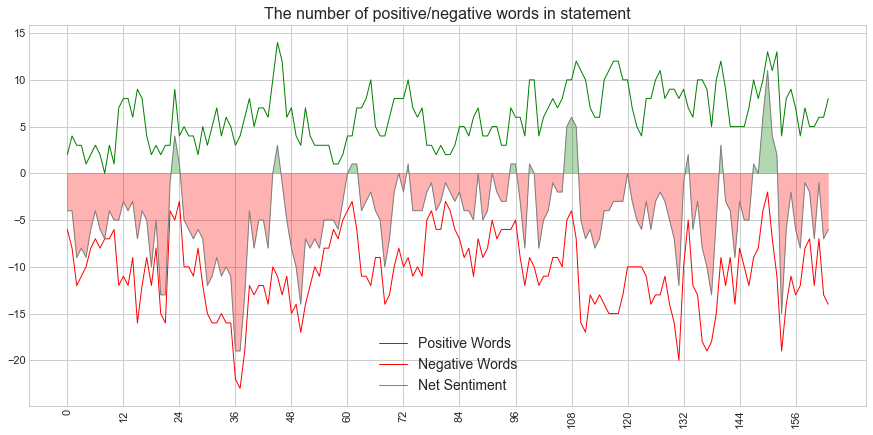

In [ ]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(15,7))
ax = plt.subplot()

plt.plot(df_approach1.index, df_approach1['n_pos_words'], c='green', linewidth= 1.0)
plt.plot(df_approach1.index, df_approach1['n_neg_words']*-1, c='red', linewidth=1.0)
plt.plot(df_approach1.index, df_approach1['net_sent'], c='grey', linewidth=1.0)

plt.title('The number of positive/negative words in statement', fontsize=16)
plt.legend(['Positive Words', 'Negative Words', 'Net Sentiment'], prop={'size': 14}, loc='lower center') #loc=1)

ax.fill_between(df_approach1.index, df_approach1['net_sent'], where=(df_approach1['net_sent'] > 0), color='green', alpha=0.3, interpolate=True)
ax.fill_between(df_approach1.index, df_approach1['net_sent'], where=(df_approach1['net_sent'] <= 0), color='red', alpha=0.3, interpolate=True)

import matplotlib.dates as mdates
half_year_locator = mdates.MonthLocator(interval=6)  # every month
year_formatter = mdates.DateFormatter('%Y')

plt.xticks(np.arange(0,len(df_approach1.text),12), rotation = 'vertical')

ax.grid(True)

plt.show()

Positive and negative word counts highly correlated probably because of the total number of words varies. Take the positive - negative as Net Sentiment.

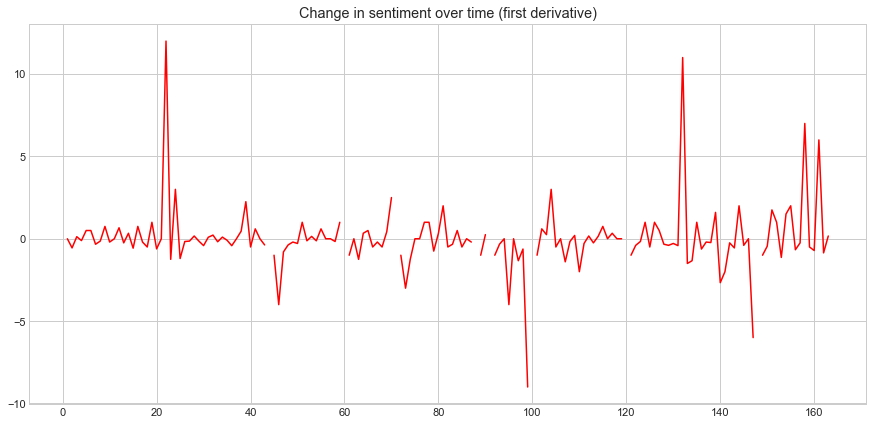

In [ ]:
firstderivative = (df_approach1['net_sent'].shift(1) - df_approach1['net_sent']) / df_approach1['net_sent']

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df_approach1.index, firstderivative, 
         c = 'red')

plt.title('Change in sentiment over time (first derivative)')

# format the ticks
# round to nearest years.


plt.show()

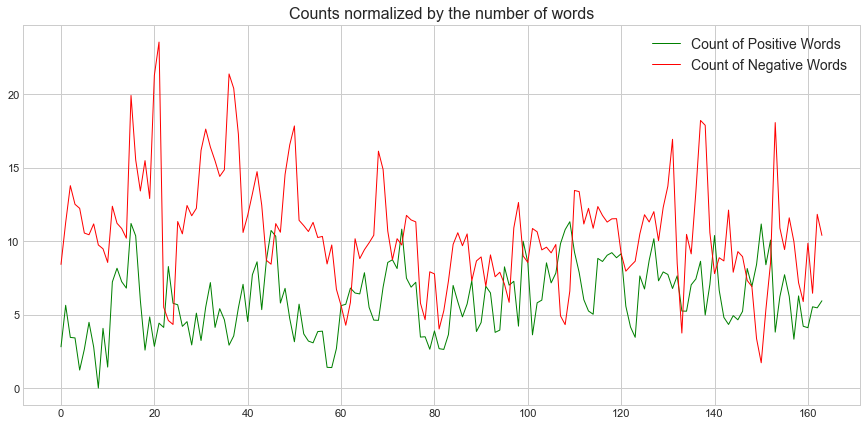

In [ ]:
# Normalize data
NPositiveWordsNorm = df_approach1['n_pos_words'] / df_approach1['word_count'] * np.mean(df_approach1['word_count'])
NNegativeWordsNorm = df_approach1['n_neg_words'] / df_approach1['word_count'] * np.mean(df_approach1['word_count'])
NetSentimentNorm = (NPositiveWordsNorm - NNegativeWordsNorm)

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_approach1.index, NPositiveWordsNorm, c='green', linewidth= 1.0)
plt.plot(df_approach1.index, NNegativeWordsNorm, c='red', linewidth=1.0)

plt.title('Counts normalized by the number of words', fontsize=16)
plt.legend(['Count of Positive Words', 'Count of Negative Words'],
           prop={'size': 14},
           loc = 1
           )


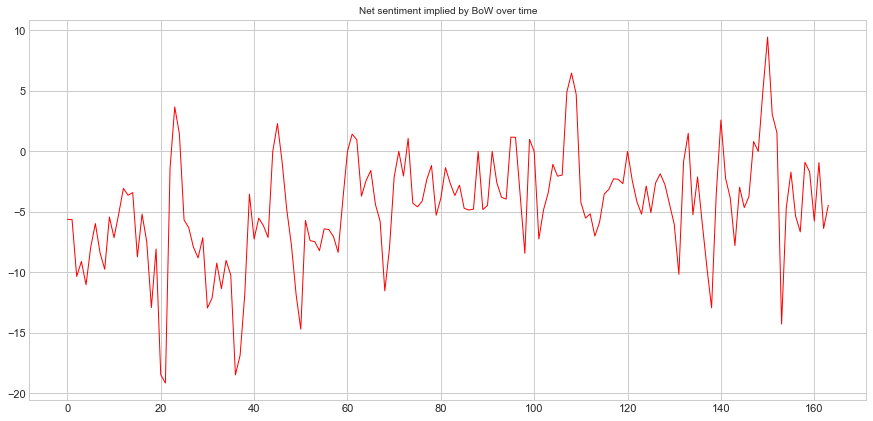

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df_approach1.index, NetSentimentNorm, c='red', linewidth=1.0)

plt.title('Net sentiment implied by BoW over time',size = 'medium')
plt.show()

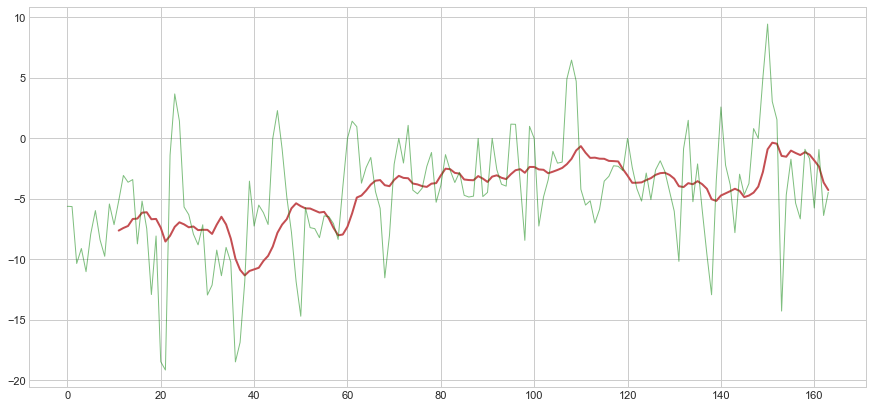

In [ ]:
Window = 12
CompToMA = NetSentimentNorm.rolling(Window).mean()

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df_approach1.index, CompToMA, c = 'r', linewidth= 2)
ax.plot(df_approach1.index, NetSentimentNorm, c = 'green', linewidth= 1, alpha = 0.5)
plt.show()

## Approach 2: sentence evaluation (Gonzalez and Tadle, 2021)
Skip next cell and go straight to English

In [ ]:
# Spanish

hawkish = ['crédito', 'dólar', 'doméstica', 'domestico', 'moneda nacional', 'demanda', 'actividad económica', 
             'sistema financiero', 'producto alimenticio', 'moneda extranjera', 'divisas', 'economía global', 
             'crecimiento', 'inflación', 'determinante de la inflación', 'pronóstico de inflación', 'financiero internacional', 
             'mercado', 'precio', 'precios', 'recuperación', 'choque de oferta', 'choques de oferta']

#dovish = ['presiones', 'riesgo', 'desaceleración', 'déficit', 'incertidumbre', 'incierto']
dovish = []


positive = ['arriba','acelerar','acelerado', 'acelerada', 'acelera','aceleran','acelerando','acomodar','acomodado','acomoda','acomodando','agregado',
 'aumentar','aumentado','aumentada','aumenta','benigno','mejor','mejores','mejoras','mejoró','grande','impulsar','impulsado','impulsó',
 'brillante','calma','calmado','calmante','calmar','calmó','escala','escalar','escaló','escalando','depreciar','depreciado','deprecia','depreciándose',
 'depreciada', 'dinámica','elevar','elevado','elevados','elevada','eleva','elevan','elevando','elevándose','alentando','escalamiento','escalado','escala',
 'exceder','excedió','exceden','excede', 'excediendo','expande','expandió','expandir','expandiendo','expandido','expandida','expansivo','expansiva','rápido',
 'rápidamente','rapidez','favorable','favorablemente', 'favorece','favoreciendo','favoreció','firme','firmemente','bueno','bien', 'excelente','grande','mayor',
 'mayores','creció','crece','creciendo','crecerá','crecido','saludable','alto','mejorar','mejorado','mejora','mejorando','impulso','impulsado','impulsos','impulsando',
 'aumento','aumentó','aumentar','aumenta','aumentando','inflacionario','grande', 'largo','levantar','levantado',
 'levantando','levanta','suelto','ligero','ligeramente','ligera','máximo','máximos','máxima','máximas','mitigar','mitigado',
 'mitiga','mitigando','más','monto','optimista','supera','superar','superó','superando','pico','picos','positivo','incrementar','incrementó','incrementa',
 'incrementando','incrementos','levantado','levanta','levantando','rampa','rampado','rampante','rampas','rápido','recuperar','recuperado','recuperando','recupera',
 'reforzar','reforzado','refuerza','reforzando','restaurar','restaurado','restaura','alza','alzas','levantado','levanta',
 'levantando','satisfactorio','disparar','disparado','disparándose','disparos','estabilizar','estabiliza','estabilizado','estabilizando','estable','estabilizó',
 'estimula','estimulado','estimulante','estimulación','estimulando','estimulador','fortalece','fortalecer','fortaleció','fortaleciendo','fuerte','fortalecimiento',
 'exitoso','rápido','superior','volcado','repuntes', 'repuntando','vigoroso','ampliar','ancho','ensanchando','ensancha','amplio']

negative = ['adverso','agravar','agravado','agrava','agravando','agravante','apreciar','apreciado','aprecia','apreciando','apreciatorio','malo',
 'preocupación','preocupado','relativo','preocupaciones','conservador','restringir','restringido','restringiendo','restringe','contrato',
 'contraído','contrayendo','contractivo','contrae','corta','corta','corta','amortigua','amortigua','amortigua','amortigua','desacelera','desacelera',
 'desacelera','desacelera','deprimido','deprime','deprimida','disminuye','disminuyó','disminuyendo','disminuiría','disminuirá','disminución',
 'profundiza','profundo','profunda','profundizado','profundizando','profundiza','deflacionario','descender','descendiendo','desciende','descendió',
 'descendente','desestabilizar','desestabilizante','desestabilizador','desestable','desestabilizó','deteriorar','deteriorado','deteriora','deterioro',
 'deteriorando','deteriorada','difícil','disminuir','disminuido','disminuye','disminuyendo','disminución','decepcionante','desinflacionario','dovish','reducción','abajo',
 'abajo','soltar','caer','cayó','caería','cayendo','erosionar','erosionando','erosionar','erosionar','desvanecerse','deterioro', 'deterioró',
 'desvanecerse','falla','fallar','falló','fallando','caer','caído','cayendo','caídas','cayó','menos','aplanar','aplanar',
 'aplanar','aplanar','fluctuar','fluctuado','fluctúa','fluctuante','frágil','daño','dañado','dañando','daña','inconsistente','peligro',
 'peligroso','peligrosa','peligrosos','peligrosas ','peligrosamente','mediocre','menos','menor','bajo','rebajada','rebajado',
 'rebajando','baja','suave','mínimo','mínimos','mínima','mínimas','menores','moderado','moderada','moderados','moderadamente','modera','moderando',
 'moderar','moderarse','modesto','modesta','negativo','pesimista','pobre','recesionario','recesión','recesiva','recortado','recortada',
 'recesivo','reducir ','reducido','reducida','reduce','reduciendo','restrictivo','arriesgado','arriesgado','hundido','hundida','acortar','acortado','acortada','recorte',
 'encoger','encoger','encoge','encogido','encogido','fregadero','hundimiento','lento','lenta','lentos','lentas','lentamente','ralentizado','ralentizada','pequeño',
 'pequeña','ínfimo','pequeños','pequeñas','suavizar','suavizado','suave','suavizando','especular','especuló','especulando','especulativo','especulativa','estresar',
 'estresado','estresando', 'estresada','estresaría','estricto','estrictos','moderado','hundido','hundida','suprimir','suprimido','suprime','suprimiendo','amenazar',
 'amenazado ','amenazante','amenaza','apretar ','apretado','apretando','apretando','más apretado','más duro','turbulento','incierto','socavar','desfavorable',
 'desfavorables','desfavoreciendo','inestable','volátil','vulnerable','débil','debilitar','debilitado','debilitando','debilita','débil','peor','empeorar',
 'empeorando','empeoramiento','empeorararía','peor','empeoró','empeore']

In [ ]:
# English

#Australia

hawkish_AUS = ['business', 'businesses','commodity price', 'condition', 'confidence', 'credit', 'demand', 'economic', 'economy',
               'employment', 'exchange rate', 'expansion', 'expect', 'expected', 'expectation','financial market', 'global',
               'growth', 'household', 'housing', 'housing market', 'inflation', 'international', 'investment', 'lending', 'market',
               'pressure', 'price', 'prospect', 'recovery', 'spending', 'stance', 'trade', 'trend', 'wage', 'world']

dovish_AUS = ['risk', 'spare capacity', 'uncertainty']

#South Africa
hawkish_SA = ['bank', 'consumption' 'expenditure', 'core inflation', 'country', 'cpix inflation', 'demand', 'development',
           'domestic', 'economy', 'electricity', 'employment', 'environment', 'exchange rate', 'expenditure', 'food',
           'food price', 'forecast', 'global', 'growth', 'inflation', 'inflation expectation', 'inflation outlook',
            'inflation target', 'inflationary pressure', 'mining sector', 'outlook', 'petrol price', 'price', 'rand',
            'recovery', 'upside risk']

#dovish = ['presiones', 'riesgo', 'desaceleración', 'déficit', 'incertidumbre', 'incierto']
dovish_SA = []


# Thailand
hawkish_THA = ['consumer', 'consumption', 'demand', 'expectation', 'export', 'financial', 'growth', 'housing', 'inflation', 'lending',
                'liquidity', 'market', 'oil', 'petroleum', 'price', 'recovery', 'sentiment', 'stock', 'surplus']

dovish_THA = ['risk', 'slowdown', 'uncertainty']
    
    
positive = ['above', 'accelerate', 'accelerated', 'accelerates', 'accelerating', 'accommodate','accommodated', 'accommodates',
            'accommodating', 'added', 'augment', 'augmented', 'augmenting', 'augments', 'benign', 'best', 'better', 'biggest',
            'boost', 'boosted', 'boosting', 'boosts', 'brighter', 'buoy', 'buoyant', 'buoyed', 'buoying', 'buoys', 'calm', 'calmed',
            'calming', 'calms', 'climb', 'climbed', 'climbing', 'climbs', 'depreciate', 'depreciated', 'depreciates', 'depreciating',
            'dynamic', 'elevate', 'elevated', 'elevates', 'elevating', 'encouraging', 'escalate', 'escalated', 'escalates', 'escalating',
            'exceed', 'exceeded', 'exceeding', 'exceeds', 'expand', 'expanded', 'expanding', 'expands', 'expansionary', 'expansive',
            'fast', 'faster', 'fastest', 'favorable', 'favourable', 'firmer', 'good', 'great', 'greater', 'greatest', 'grew', 'grow', 'growing',
            'grown', 'grows', 'healthier', 'high', 'higher', 'highest', 'improve', 'improved', 'improves', 'improving', 'impulse', 'impulsed',
            'impulses', 'impulsing', 'increase', 'increased', 'increases', 'increasing', 'inflationary', 'large', 'larger', 'largest',
            'lift', 'lifted', 'lifting', 'lifts', 'loose', 'loosen', 'loosened', 'loosening', 'loosens', 'looser', 'maximum', 'mitigate',
            'mitigated', 'mitigates', 'mitigating', 'more', 'mount', 'mounted', 'mounting', 'mounts', 'optimistic', 'outperform',
            'outperformed', 'outperforming', 'outperforms', 'peak', 'peaked', 'peaking', 'peaks', 'pick', 'picked', 'picking', 'picks',
            'positive', 'raise', 'raised', 'raises', 'raising', 'ramp', 'ramped', 'ramping', 'ramps', 'rapid', 'recover', 'recovered',
            'recovering', 'recovers', 'reinforce', 'reinforced', 'reinforces', 'reinforcing', 'restore', 'restored', 'restores',
            'restoring', 'rise', 'risen', 'rises', 'rising', 'rose', 'satisfactory', 'skyrocket', 'skyrocketed', 'skyrocketing',
            'skyrockets', 'spike', 'spiked', 'spikes', 'spiking', 'spur', 'spurred', 'spurring', 'spurs', 'stabilise', 'stabilised',
            'stabilises', 'stabilising', 'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'steady', 'stimulate',
            'stimulated', 'stimulates', 'stimulating', 'stimulative', 'stimulatory', 'strengthen', 'strengthened', 'strengthening',
            'strengthens', 'strong', 'stronger', 'strongest', 'successful', 'surge', 'surged', 'surges', 'surging', 'swifter', 'upper',
            'upside', 'upswing', 'upswinging', 'upswings', 'upswung', 'uptrend', 'upturn', 'upturned', 'upturning', 'upturns', 'upward',
            'vigorous', 'widen', 'widened', 'widening', 'widens', 'wider']

negative = ['adverse', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'appreciate', 'appreciated', 'appreciates',
            'appreciating', 'appreciatory', 'bad', 'bottom', 'bottomed', 'bottoming', 'bottoms', 'concern', 'concerned', 
            'concerning', 'concerns', 'conservative', 'constrain', 'constrained', 'constraining', 'constrains', 'contract',
            'contracted', 'contracting', 'contractionary', 'contracts', 'cut', 'cuts', 'cutting', 'dampen', 'dampened',
            'dampening', 'dampens', 'decelerate', 'decelerated', 'decelerates', 'decelerating', 'decline', 'declined', 'declines', 'declining', 
            'decrease', 'decreased', 'decreases', 'decreasing', 'deepen', 'deepened', 'deepening', 'deepens', 'deflationary', 
            'descend', 'descended', 'descending', 'descends', 'destabilizing', 'deteriorate', 'deteriorated', 'deteriorates', 
            'deteriorating', 'difficult', 'diminish', 'diminished', 'diminishes', 'diminishing', 'disappointing', 
            'disinflationary', 'dovish', 'down', 'downside', 'downsize', 'downsized', 'downsizes', 'downsizing', 'downward', 
            'downwards', 'drop', 'dropped', 'dropping', 'drops', 'erode', 'eroded', 'erodes', 'eroding', 'fade', 'faded', 'fades', 
            'fading', 'fail', 'failed', 'failing', 'fails', 'fall', 'fallen', 'falling', 'falls', 'fell', 'fewer', 'flatten', 'flattened',
            'flattening', 'flattens', 'fluctuate', 'fluctuated', 'fluctuates', 'fluctuating', 'fragile', 'harm', 'harmed', 'harming',
            'harms', 'inconsistent', 'jeopardise', 'jeopardised', 'jeopardises', 'jeopardising','jeopardize', 'jeopardized', 
            'jeopardizes', 'jeopardizing', 'lackluster', 'least', 'less', 'low', 'lower', 'lowered', 'lowering', 'lowers', 'lowest',
            'mild', 'minimal', 'minimum', 'minor', 'moderate', 'moderated', 'moderates', 'moderating', 'modest', 'negative', 
            'pessimistic', 'poor', 'recessionary', 'reduce', 'reduced', 'reduces', 'reducing', 'restrictive', 'riskier', 'risky',
            'sank', 'shorten', 'shortened', 'shortening', 'shortens', 'shrink', 'shrinking', 'shrinks', 'shrunk', 'shrunken', 'sink',
            'sinking', 'slow', 'slowed', 'slower', 'slowest', 'slowing', 'slows', 'sluggish', 'small', 'smaller', 'smallest', 'soften',
            'softened', 'softening', 'softens', 'speculate', 'speculated', 'speculates', 'speculating', 'stress', 'stressed', 
            'stresses', 'stressing', 'stringent', 'subdued', 'subprime', 'sunk', 'suppress', 'suppressed', 'suppresses', 
            'suppressing', 'threaten', 'threatened', 'threatening', 'threatens', 'tighten', 'tightened', 'tightening', 
            'tightens', 'tighter', 'tougher', 'turbulent', 'uncertain', 'unclear', 'undermine', 'unfavorable', 'unfavourable', 
            'unstable', 'volatile', 'vulnerable', 'wane', 'waned', 'wanes', 'waning', 'weak', 'weaken', 'weakened', 'weakening', 
            'weakens', 'weaker', 'weakest', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst']


In [ ]:
# Main dictionary - choose which list of dovish/ hawkish words to use
lmdict = {'hawkish': hawkish_AUS, 'dovish':dovish_AUS, 'positive': positive, 'negative': negative}

In [ ]:
def tone_count_sentence_evaluation(dict, doc):
    tone_score_list = []
    words_count_list = []
    haw_words = []
    dov_words = []
    pos_words = []
    neg_words = []

    sentences = doc.lower().split('.')
    sentences_count = len(sentences)

    for sentence in sentences:
        sentence_score = 0
        haw_count = 0
        dov_count = 0
        pos_count = 0
        neg_count = 0

        input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', sentence.lower())
        words_count = len(input_words)
        words_count_list.append(words_count)

        for i in range(0, words_count):
            if input_words[i] in dict['hawkish']:
                haw_count += 1
                haw_words.append(input_words[i])
            if input_words[i] in dict['dovish']:
                dov_count += 1
                dov_words.append(input_words[i])
            if input_words[i] in dict['positive']:
                pos_count += 1
                pos_words.append(input_words[i])
            if input_words[i] in dict['negative']:
                neg_count += 1
                neg_words.append(input_words[i])

        if (words_count > 0): #and (haw_count != 0 and dov_count != 0):
            if haw_count > dov_count:
                if pos_count > neg_count:
                    sentence_score = 1
                    tone_score_list.append(sentence_score)
                elif pos_count == neg_count:
                    sentence_score = 0
                    tone_score_list.append(sentence_score)
                elif pos_count < neg_count:
                    sentence_score = -1
                    tone_score_list.append(sentence_score)
            elif haw_count == dov_count:
                if pos_count > neg_count:
                    sentence_score = 1
                    tone_score_list.append(sentence_score)
                elif pos_count == neg_count:
                    sentence_score = 0
                    tone_score_list.append(sentence_score)
                elif pos_count < neg_count:
                    sentence_score = -1
                    tone_score_list.append(sentence_score)
            elif haw_count < dov_count:
                if pos_count > neg_count:
                    sentence_score = -1
                    tone_score_list.append(sentence_score)
                elif pos_count == neg_count:
                    sentence_score = 0
                    tone_score_list.append(sentence_score)
                elif pos_count < neg_count:
                    sentence_score = 1
                    tone_score_list.append(sentence_score)
        else:
            sentence_score = 0
            tone_score_list.append(sentence_score)
        
    results = [100*sum(tone_score_list)/sentences_count, sentences_count, sum(words_count_list), haw_words, dov_words, pos_words, neg_words]
    return results

columns = ['tone_GT', 'sentence_count', 'word_count', 'haw_words', 'dov_words', 'pos_modifiers', 'neg_modifiers']

In [ ]:
# Analyze tone for original text dataframe #MPH df_new and toxtext
print(df_text.shape)
tone_lmdict = [tone_count_sentence_evaluation(lmdict, x) for x in tqdm(df_text_new['tok_text'], total=df_text_new.shape[0])]
tone_lmdict_df = pd.DataFrame(tone_lmdict, columns=columns)
tone_lmdict_df['Index'] = range(0, len(tone_lmdict_df))
df_approach2 = pd.merge(df_text_new, tone_lmdict_df, on='Index')
df_approach2

(165, 3)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/165 [00:00<?, ?it/s]

,date,text,Index,tok_text,tone_GT,sentence_count,word_count,haw_words,dov_words,pos_modifiers,neg_modifiers
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,monetary policy at meet today board decide red...,-100.0,1,253,"[financial, financial, market, sentiment, pric...",[],"[stabilise, expansionary, large]","[reduce, fragile, weak, slow, fall, moderate, ..."
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,monetary policy at meet today board decide red...,-100.0,1,252,"[financial, market, price, financial, price, d...",[],"[strengthen, stabilise, high, pick]","[reduce, turbulent, volatile, fell, slow, fall..."
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,monetary policy at meet today board decide low...,-100.0,1,309,"[financial, market, financial, market, market,...","[risk, risk]","[restore, expansionary, surge, peak, increase,...","[lower, worse, fall, difficult, weaken, declin..."
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,monetary policy at meet today board decide low...,-100.0,1,312,"[inflation, growth, demand, demand, inflation,...","[risk, uncertainty]","[high, strong, increase, rise, higher, high, r...","[lower, reduce, tougher, tighten, difficult, c..."
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,monetary policy at meet today board decide lea...,-100.0,1,290,"[inflation, growth, demand, demand, inflation,...","[risk, uncertainty]","[high, strong, increase, rise, rise, rise, hig...","[reduce, tougher, tighten, tighten, difficult,..."
...,...,...,...,...,...,...,...,...,...,...,...
159,2022-07-05,"Media Release\nStatement by Philip Lowe, Gover...",160,monetary policy decision at meet today board d...,100.0,1,422,"[inflation, inflation, inflation, market, pric...","[uncertainty, uncertainty]","[increase, increase, increase, higher, increas...","[lower, decline, moderate, lowest, decline, lo..."
160,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,monetary policy decision at meet today board d...,100.0,1,432,"[inflation, growth, market, growth, consumer, ...","[uncertainty, risk]","[increase, increase, pick, higher, pick, incre...","[low, decline, decline, lowest, decline, lower..."
161,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,monetary policy decision at meet today board d...,100.0,1,385,"[inflation, demand, price, expectation, growth...","[uncertainty, uncertainty]","[increase, strong, recover, upward, rise, incr...","[fall, lowest, fall, low, low, lower, low, app..."
162,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,monetary policy decision at meet today board d...,100.0,1,390,"[inflation, price, demand, price, expectation,...","[uncertainty, uncertainty, uncertainty, uncert...","[recover, increase, large, increase, strong, i...","[low, lowest, decline, decline, fall, low, tig..."


In [ ]:
df_approach2[['date','tok_text','tone_GT','sentence_count','word_count','haw_words','dov_words','pos_modifiers', 'neg_modifiers']]


,date,tok_text,tone_GT,sentence_count,word_count,haw_words,dov_words,pos_modifiers,neg_modifiers
0,2008-12-02,monetary policy at meet today board decide red...,-100.0,1,253,"[financial, financial, market, sentiment, pric...",[],"[stabilise, expansionary, large]","[reduce, fragile, weak, slow, fall, moderate, ..."
1,2008-11-04,monetary policy at meet today board decide red...,-100.0,1,252,"[financial, market, price, financial, price, d...",[],"[strengthen, stabilise, high, pick]","[reduce, turbulent, volatile, fell, slow, fall..."
2,2008-10-07,monetary policy at meet today board decide low...,-100.0,1,309,"[financial, market, financial, market, market,...","[risk, risk]","[restore, expansionary, surge, peak, increase,...","[lower, worse, fall, difficult, weaken, declin..."
3,2008-09-02,monetary policy at meet today board decide low...,-100.0,1,312,"[inflation, growth, demand, demand, inflation,...","[risk, uncertainty]","[high, strong, increase, rise, higher, high, r...","[lower, reduce, tougher, tighten, difficult, c..."
4,2008-08-05,monetary policy at meet today board decide lea...,-100.0,1,290,"[inflation, growth, demand, demand, inflation,...","[risk, uncertainty]","[high, strong, increase, rise, rise, rise, hig...","[reduce, tougher, tighten, tighten, difficult,..."
...,...,...,...,...,...,...,...,...,...
159,2022-07-05,monetary policy decision at meet today board d...,100.0,1,422,"[inflation, inflation, inflation, market, pric...","[uncertainty, uncertainty]","[increase, increase, increase, higher, increas...","[lower, decline, moderate, lowest, decline, lo..."
160,2022-06-07,monetary policy decision at meet today board d...,100.0,1,432,"[inflation, growth, market, growth, consumer, ...","[uncertainty, risk]","[increase, increase, pick, higher, pick, incre...","[low, decline, decline, lowest, decline, lower..."
161,2022-05-03,monetary policy decision at meet today board d...,100.0,1,385,"[inflation, demand, price, expectation, growth...","[uncertainty, uncertainty]","[increase, strong, recover, upward, rise, incr...","[fall, lowest, fall, low, low, lower, low, app..."
162,2022-04-05,monetary policy decision at meet today board d...,100.0,1,390,"[inflation, price, demand, price, expectation,...","[uncertainty, uncertainty, uncertainty, uncert...","[recover, increase, large, increase, strong, i...","[low, lowest, decline, decline, fall, low, tig..."


## Approach 3: tokenization and lemmatization

In [ ]:
# Spanish
#import spacy
#import spacy_spanish_lemmatizer

#nlp = spacy.load('es_core_news_sm', exclude=["ner"])
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
#stop = list(nlp.Defaults.stop_words)

# English if using Spacy
import spacy
nlp = spacy.load('en_core_web_sm',exclude=["ner"])
#nlp.replace_pipe("lemmatizer", "spanish_lemmatizer")
stop = list(nlp.Defaults.stop_words)



def spacy_lemmatizer(word):
    token = nlp(word)
    for word in token:
        return word.lemma_

def lemmatize_word(word):
    '''
    Return the same word after lemmatizing the input word
    '''
    wnl = nltk.stem.WordNetLemmatizer()
    return wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v')

def spacy_tokenizer(df, col='text', nlp=nlp):

  docs = nlp.pipe(df[col]) # more efficient, delete lists once processed
  #new_stop = ['nota', 'prensa', 'directorio', 'del', 'bcr', 'bcrp','aprobó', 'programa', 'monetario', 'para', 'el', 'mes', 'de',
  #            'enero','febrero','marzo','abril','mayo','junio','julio','agosto','setiembre','septiembre','octubre','noviembre','diciembre',
  #            'ciento', 'mes','sesión','lima','informativa']
    
  new_stop = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'novermber', 'december',
              'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
             'medium', 'release', 'statement', 'glenn', 'stevens', 'governor', 'number','date', 'medium'
             'release', 'facebook', 'twitter','linkedin','email'] # ['2', '+61', '9551',] medium release statement glenn stevens governor monetary policy number date december at meet
  tokenized = []
  #wnl = nltk.stem.WordNetLemmatizer()
  for doc in tqdm(docs, total=len(df[col])):
      # Lemmatize words
      tokens = [token.lemma_ for token in doc]
      # Stop words and alphabetic filter
      tokens = [tok.lower() for tok in tokens if ((tok not in stop) and (tok.isalpha()==1)) and (tok not in new_stop)]
      tokenized.append(tokens)
  return tokenized


In [ ]:
# English if using nltk

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer 
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
from nltk.corpus import stopwords

#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stpwrd = nltk.corpus.stopwords.words('english')

# add un-lmmatised words to be added to this list (i.e. media rather than media)
new_stopwords = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',
              'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
             'media', 'release', 'statement', 'glenn', 'stevens', 'philip', 'lowe', 'governor', 'number','date',
             'release', 'facebook', 'twitter','linkedin','email']


stpwrd.extend(new_stopwords)

stop = set(stopwords.words('english'))

from tqdm import tqdm 

def tokenize_df(df, col='text'):
    '''
    Extract words which are only aphabet and not in stop word, covert to lower case.
    '''
    tokenized = []
    wnl = nltk.stem.WordNetLemmatizer()
    for text in tqdm(df[col]):
        # Filter alphabet words only and non stop words, make it lower case
        words = [word.lower() for word in word_tokenize(text) if ((word.isalpha()==1) & (word not in stop))]
        # Lemmatize words 
        tokens = [lemmatize_word(word) for word in words if (word not in new_stopwords)]
        tokenized.append(tokens)
    return tokenized

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/MargheritaP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Tokenize df_text

In [ ]:
tokenized_org = tokenize_df(df_text)                   #  spacy_tokenizer(df_text) or tokenize_df
print('len(tokenized_org): ', len(tokenized_org))
print(tokenized_org[1])

100%|██████████| 165/165 [00:02<00:00, 58.19it/s]

len(tokenized_org):  165
['monetary', 'policy', 'at', 'meet', 'today', 'board', 'decide', 'reduce', 'cash', 'rate', 'basis', 'point', 'per', 'cent', 'effective', 'world', 'financial', 'market', 'remain', 'turbulent', 'past', 'month', 'global', 'equity', 'price', 'volatile', 'fell', 'net', 'term', 'significant', 'exchange', 'rate', 'movement', 'include', 'sharp', 'depreciation', 'australian', 'dollar', 'a', 'government', 'announce', 'measure', 'strengthen', 'financial', 'system', 'help', 'stabilise', 'condition', 'time', 'international', 'economic', 'data', 'continue', 'point', 'significant', 'weakness', 'major', 'industrial', 'economy', 'sign', 'china', 'part', 'develop', 'world', 'slow', 'well', 'these', 'condition', 'contribute', 'fall', 'world', 'commodity', 'price', 'in', 'australia', 'overall', 'path', 'economic', 'activity', 'appear', 'recently', 'close', 'board', 'expect', 'need', 'moderation', 'demand', 'occur', 'period', 'earlier', 'strength', 'recent', 'reduction', 'borrow', 

In [ ]:
df_text['text'][0]

"Media Release\nStatement by Glenn Stevens, Governor: Monetary Policy\nNumber\n2008-27\nDate\n2 December 2008\nAt its meeting today, the Board decided to reduce the cash rate by a further 100 basis points, to 4.25 per cent, effective 3 December 2008.\nRecent actions by governments and central banks to stabilise their respective financial systems have begun to take effect.  Nonetheless, financial market sentiment remains fragile, as evidence accumulates of weak economic conditions in the major countries and a significant slowing in many emerging countries.  Commodity prices have fallen further.  This, combined with the likelihood of below-trend growth in the global economy, suggests that global inflation will moderate significantly in 2009.\nThe Australian economy has been more resilient than other advanced economies, but recent data nonetheless indicate that a significant moderation in demand and activity has been occurring. With confidence affected by the financial turbulence and a de

In [ ]:
# Concat the list to create docs
lemma_docs_org = [" ".join(words) for words in tokenized_org]
print('len(lemma_docs_org): ', len(lemma_docs_org))
print(lemma_docs_org[0])

len(lemma_docs_org):  165
monetary policy at meet today board decide reduce cash rate basis point per cent effective recent action government central bank stabilise respective financial system begin take effect nonetheless financial market sentiment remain fragile evidence accumulate weak economic condition major country significant slow many emerge country commodity price fall this combine likelihood growth global economy suggest global inflation moderate significantly the australian economy resilient advance economy recent data nonetheless indicate significant moderation demand activity occur with confidence affect financial turbulence decline term trade way cautious behaviour household business likely see private demand remain subdue near term with outlook capacity pressure ease likely inflation australia soon start fall global disinflationary force assist regard though depreciation exchange rate mean decline inflation target could take longer would otherwise case weigh internationa

In [ ]:
# Create a list of all the words in the dataframe
all_words_org = [word for text in tokenized_org for word in text]
print('len(all_words_org): ', len(all_words_org))
print(all_words_org[0])

# Counter object of all the words
counts_org = Counter(all_words_org)
print('len(counts_org): ', len(counts_org))

# Create a Bag of Word, sorted by the count of words
bow_org = sorted(counts_org, key=counts_org.get, reverse=True)
print('bow_org[:20]', bow_org[:20])

# Indexing vocabulary, starting from 1.
vocab_org = {word: ii for ii, word in enumerate(counts_org, 1)}
id2vocab_org = {v: k for k, v in vocab_org.items()}

print("vocab_org['inflation']: ", vocab_org['inflation'])      # inflación
print("vocab_org['growth']: ", vocab_org['growth'])  # crecimiento

#len(all_words_org):  42982
#aprobar
#len(counts_org):  1264
#bow_org[:20] ['tasa', 'inflación', 'interés', 'mantener', 'operaciones', 'anual', 'referencia', 'meta', 'rango', 'temporal', 'actividad', 'compra', 'indicador', 'financiero', 'crédito', 'económico', 'expectativa', 'ubicar', 'política', 'precio']
#vocab_org['inflación']:  36
#vocab_org['crecimiento']:  57

len(all_words_org):  58542
monetary
len(counts_org):  1466
bow_org[:20] ['rate', 'growth', 'the', 'inflation', 'remain', 'share', 'year', 'economy', 'market', 'policy', 'australia', 'expect', 'per', 'cent', 'monetary', 'continue', 'price', 'board', 'bank', 'low']
vocab_org['inflation']:  54
vocab_org['growth']:  50


In [ ]:
# Create token id list
token_ids_org = [[vocab_org[word] for word in text_words] for text_words in tokenized_org]
print(len(token_ids_org))

165


In [ ]:
# Add to the dataframe
df_approach3 = df_text.copy(deep=True)
df_approach3['tokenized'] = tokenized_org
df_approach3['token_ids'] = token_ids_org
df_approach3

,date,text,Index,tokenized,token_ids
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ..."
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ..."
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,..."
...,...,...,...,...,...
161,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,..."
162,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,..."
163,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,..."
164,2022-03-01,"Media Release\nStatement by Philip Lowe, Gover...",164,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='tokenized_text', ylabel='Density'>

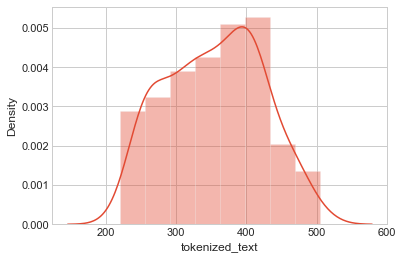

In [ ]:
df_approach3['tokenized_text'] = df_approach3['tokenized'].apply(lambda x: " ".join(x))
sns.distplot(df_approach3['tokenized_text'].apply(lambda x: len(x.split())))

### Lemmatize sentiment

In [ ]:
# pd.get_dummies(sentiment_spanish, prefix=None, dtype=bool)
# sentiment_spanish.columns = [column.lower() for column in sentiment_spanish.columns]

# Lemmertize sentiment words as well
lemma_sentiment_df = sentiment_english.copy()                                                  #sentiment_spanish
lemma_sentiment_df['Word'] = [lemmatize_word(word) for word in lemma_sentiment_df['Word']]
# Drop duplicates
lemma_sentiment_df = sentiment_english.drop_duplicates('Word')                                   #sentiment_spanish
# Sentiment list
lemma_sentiments = list(lemma_sentiment_df['Sentiment'].unique())

In [ ]:
lemma_sentiment_df.groupby(by=['Sentiment']).count()

,Word
Sentiment,
negative,2353
positive,354


### Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf(sentiment_words, docs):
    """
    Generate TFIDF values from documents for a certain sentiment

    Parameters
    ----------
    sentiment_words: Pandas Series
        Words that signify a certain sentiment
    docs : list of str
        List of documents used to generate bag of words

    Returns
    -------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.
    """
    vectorizer = TfidfVectorizer(analyzer='word', vocabulary=sentiment_words)
    tfidf = vectorizer.fit_transform(docs)
    features = vectorizer.get_feature_names()
    
    return tfidf.toarray()

#### Text Dataframe

In [ ]:
# Using the get_tfidf function, let's generate the TFIDF values for all the documents.
sentiment_tfidf_org = {
        sentiment: get_tfidf(lemma_sentiment_df.loc[lemma_sentiment_df['Sentiment'] == sentiment]['Word'], lemma_docs_org)
        for sentiment in lemma_sentiments}

print(len(sentiment_tfidf_org['negative']))
print(len(sentiment_tfidf_org['negative'][0]))

165
2353


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_approach3.shape

(165, 6)

In [ ]:
for sentiment in lemma_sentiments:
    df_approach3['tfidf_' + sentiment] = list(sentiment_tfidf_org[sentiment])
    
df_approach3

,date,text,Index,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
161,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
162,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
163,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
164,2022-03-01,"Media Release\nStatement by Philip Lowe, Gover...",164,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Cosine Similarity

Using the TFIDF values, we'll calculate the cosine similarity and plot it over time. Implement `get_cosine_similarity` to return the cosine similarities between each tick in time. Since the input, `tfidf_matrix`, is a TFIDF vector for each time period in order, you just need to computer the cosine similarities for each neighboring vector.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(tfidf_matrix):
    """
    Get cosine similarities for each neighboring TFIDF vector/document

    Parameters
    ----------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.

    Returns
    -------
    cosine_similarities : list of float
        Cosine similarities for neighboring documents
    """
    #print(tfidf_matrix)
    return [cosine_similarity(u.reshape(1,-1), v.reshape(1,-1))[0][0].tolist() for u, v in zip(tfidf_matrix, tfidf_matrix[1:])]

In [ ]:
cosine_similarities = {
    sentiment_name: get_cosine_similarity(sentiment_values) 
    for sentiment_name, sentiment_values in sentiment_tfidf_org.items()}

print(len(cosine_similarities['negative']))

164


In [ ]:
for sentiment in lemma_sentiments:
    # Add 0 to the first element as there is no comparison available to a previous value
    cosine_similarities[sentiment].insert(0, 0)
    df_approach3['cos_sim_' + sentiment] = cosine_similarities[sentiment]
    
df_approach3

,date,text,Index,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive
0,2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
1,2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",1,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863
2,2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",2,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379
3,2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",3,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860
4,2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",4,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678
...,...,...,...,...,...,...,...,...,...,...
161,2022-06-07,"Media Release\nStatement by Philip Lowe, Gover...",161,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.795050,0.458205
162,2022-05-03,"Media Release\nStatement by Philip Lowe, Gover...",162,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.764838,0.748202
163,2022-04-05,"Media Release\nStatement by Philip Lowe, Gover...",163,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.149550,0.400076
164,2022-03-01,"Media Release\nStatement by Philip Lowe, Gover...",164,"[monetary, policy, decision, at, meet, today, ...","[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...",monetary policy decision at meet today board d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.543947,0.269802


In [ ]:
df_approach3[['date','tokenized_text','token_ids','tfidf_negative','tfidf_positive','cos_sim_negative','cos_sim_positive']]



,date,tokenized_text,token_ids,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive
0,2008-12-02,monetary policy at meet today board decide red...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
1,2008-11-04,monetary policy at meet today board decide red...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863
2,2008-10-07,monetary policy at meet today board decide low...,"[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379
3,2008-09-02,monetary policy at meet today board decide low...,"[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860
4,2008-08-05,monetary policy at meet today board decide lea...,"[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678
...,...,...,...,...,...,...,...
161,2022-06-07,monetary policy decision at meet today board d...,"[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.795050,0.458205
162,2022-05-03,monetary policy decision at meet today board d...,"[1, 2, 117, 3, 4, 5, 6, 7, 258, 9, 10, 99, 11,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.764838,0.748202
163,2022-04-05,monetary policy decision at meet today board d...,"[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.149550,0.400076
164,2022-03-01,monetary policy decision at meet today board d...,"[1, 2, 117, 3, 4, 5, 6, 7, 809, 9, 10, 99, 11,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.543947,0.269802


In [ ]:
df_approach3['cos_sim_negative'].max()

1.0

In [ ]:
#df_text.to_csv(data_path+'/sentiment_peru_3.csv',index=False)

## Unify main features in df_merged

In [ ]:
df_approach1 = df_approach1[['Index','tone_LM']]
df_approach2 = df_approach2[['Index','tone_GT']]
df_approach3 = df_approach3[['Index','tokenized','token_ids','tokenized_text','tfidf_negative','tfidf_positive','cos_sim_negative','cos_sim_positive']]

data_frames = [df_text, df_approach1, df_approach2, df_approach3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Index'], how='outer'), data_frames)
df_merged = df_merged.set_index(pd.to_datetime(df_merged['date'], format="%Y-%m-%d")).drop(columns=['date','Index'])


In [ ]:
df_merged.head()

,text,tone_LM,tone_GT,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive
date,,,,,,,,,,
2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",-1.581028,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",-1.587302,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863
2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",-2.912621,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379
2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",-2.564103,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860
2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",-3.103448,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678


In [ ]:
df_merged['dates'] = df_merged.index
print(type(df_merged['dates'][1]))
df_merged.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,text,tone_LM,tone_GT,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive,dates
date,,,,,,,,,,,
2008-12-02,"Media Release\nStatement by Glenn Stevens, Gov...",-1.581028,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000,2008-12-02
2008-11-04,"Media Release\nStatement by Glenn Stevens, Gov...",-1.587302,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863,2008-11-04
2008-10-07,"Media Release\nStatement by Glenn Stevens, Gov...",-2.912621,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379,2008-10-07
2008-09-02,"Media Release\nStatement by Glenn Stevens, Gov...",-2.564103,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860,2008-09-02
2008-08-05,"Media Release\nStatement by Glenn Stevens, Gov...",-3.103448,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678,2008-08-05


In [ ]:
# set to first of month

df_merged["dates"] = df_merged["dates"].astype("datetime64[M]") 
df_merged = df_merged.set_index(pd.to_datetime(df_merged['dates'], format="%Y-%m-%d")).drop(columns=['dates'])

df_merged.head()

,text,tone_LM,tone_GT,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive
dates,,,,,,,,,,
2008-12-01,"Media Release\nStatement by Glenn Stevens, Gov...",-1.581028,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
2008-11-01,"Media Release\nStatement by Glenn Stevens, Gov...",-1.587302,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863
2008-10-01,"Media Release\nStatement by Glenn Stevens, Gov...",-2.912621,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379
2008-09-01,"Media Release\nStatement by Glenn Stevens, Gov...",-2.564103,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860
2008-08-01,"Media Release\nStatement by Glenn Stevens, Gov...",-3.103448,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678


In [ ]:
df_merged.to_csv(data_path+'/text_sentiment_data_AUS_updated.csv', index_label=False)
df_merged.head()

,text,tone_LM,tone_GT,tokenized,token_ids,tokenized_text,tfidf_negative,tfidf_positive,cos_sim_negative,cos_sim_positive
dates,,,,,,,,,,
2008-12-01,"Media Release\nStatement by Glenn Stevens, Gov...",-1.581028,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
2008-11-01,"Media Release\nStatement by Glenn Stevens, Gov...",-1.587302,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",monetary policy at meet today board decide red...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.255228,0.613863
2008-10-01,"Media Release\nStatement by Glenn Stevens, Gov...",-2.912621,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096919,0.715379
2008-09-01,"Media Release\nStatement by Glenn Stevens, Gov...",-2.564103,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 217, 9, 10, 11, 12, 13, ...",monetary policy at meet today board decide low...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.134836,0.312860
2008-08-01,"Media Release\nStatement by Glenn Stevens, Gov...",-3.103448,-100.0,"[monetary, policy, at, meet, today, board, dec...","[1, 2, 3, 4, 5, 6, 7, 367, 9, 10, 368, 13, 14,...",monetary policy at meet today board decide lea...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.994016,0.763678
